<h5> Importing Libraries: </h5>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.cluster import KMeans

<h5> Importing Data: </h5>

In [6]:
df = pd.read_csv('Mall_Customers.csv')

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h5> EDA: </h5>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

<h5> Visualization: </h5>

In [11]:
df['Age_group'] = df['Age'].apply(lambda x: '0-18' if x <=18 else '19-36' if x > 18 and x <= 36 else '37-54' if x > 36 and x <= 54 else '55+')
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group
71,72,Female,47,49,42,37-54
26,27,Female,45,28,32,37-54
16,17,Female,35,21,35,19-36
151,152,Male,39,78,88,37-54
114,115,Female,18,65,48,0-18


<Figure size 1000x500 with 0 Axes>

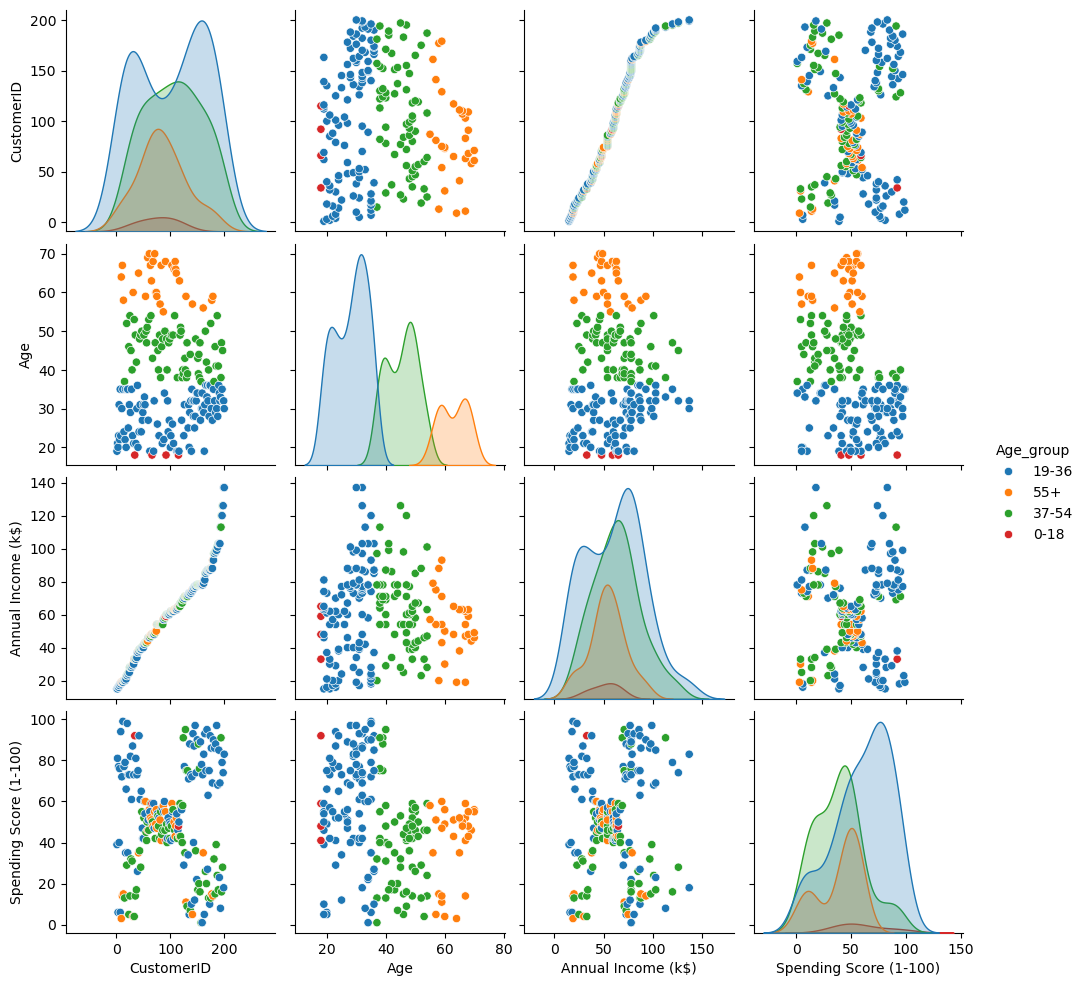

In [12]:
plt.figure(figsize=(10, 5))
sns.pairplot(df, hue='Age_group')
plt.show()

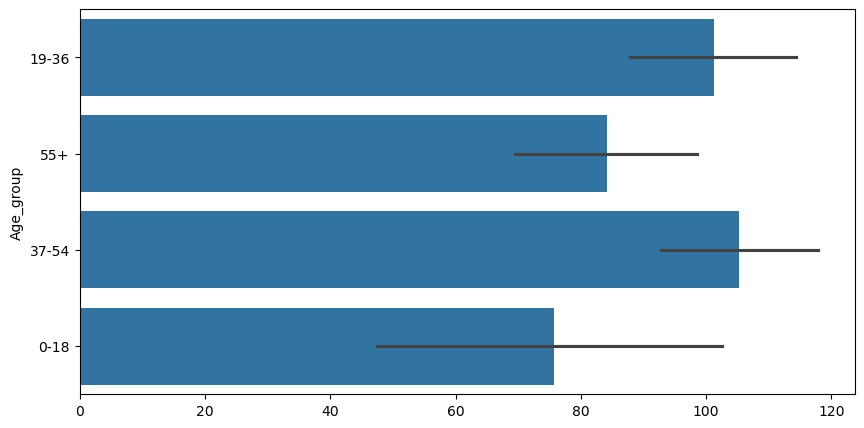

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(df.Age_group)
plt.show()

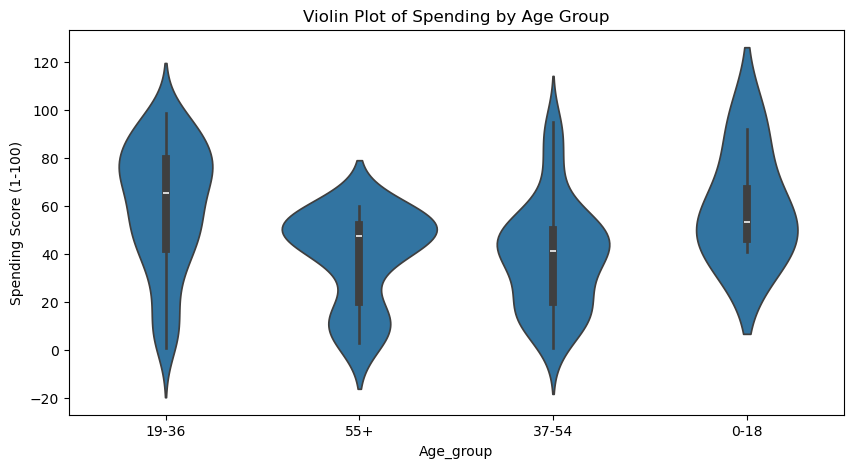

In [14]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Age_group', y='Spending Score (1-100)', data=df)
plt.title('Violin Plot of Spending by Age Group')
plt.show()

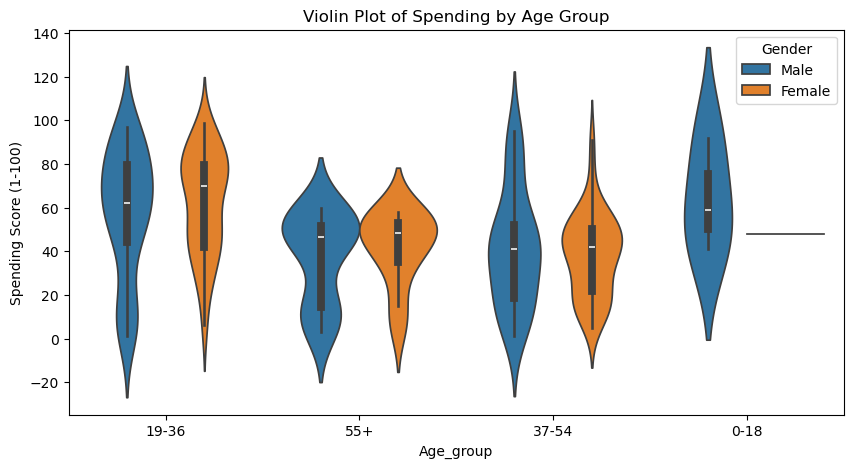

In [15]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Age_group', y='Spending Score (1-100)', data=df, hue='Gender')
plt.title('Violin Plot of Spending by Age Group')
plt.show()

In [16]:
df[df.Age_group == '55+'][:5]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group
8,9,Male,64,19,3,55+
10,11,Male,67,19,14,55+
12,13,Female,58,20,15,55+
30,31,Male,60,30,4,55+
40,41,Female,65,38,35,55+


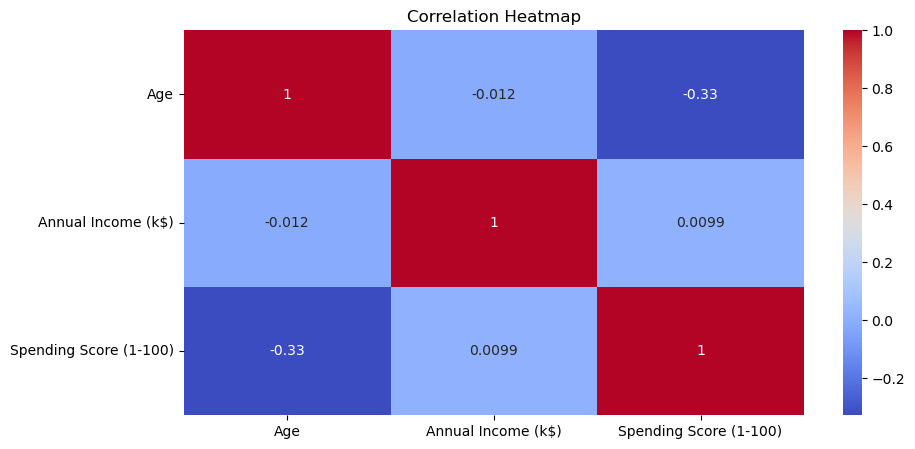

In [17]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

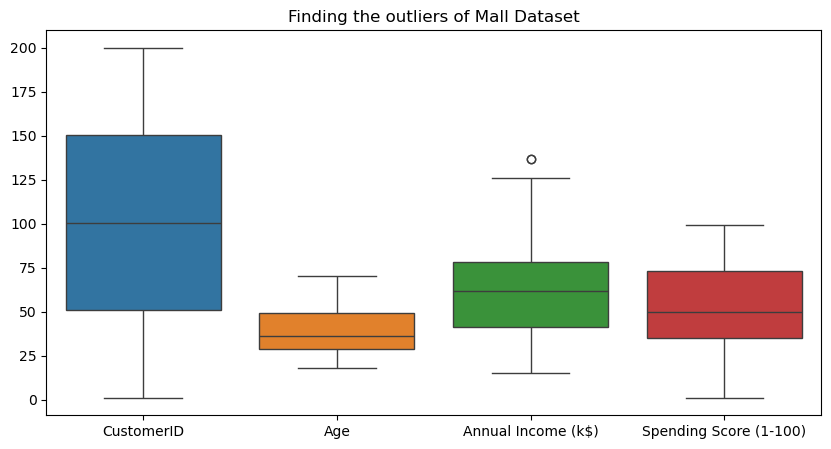

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title('Finding the outliers of Mall Dataset')
plt.show()

In [19]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == "Male" else 1)

In [20]:
df['Age_group'].value_counts()

Age_group
19-36    100
37-54     66
55+       30
0-18       4
Name: count, dtype: int64

In [21]:
df['Age_group'] = df['Age_group'].apply(lambda x: 0 if x == "0-18" else 1 if x == "19-36" else 2 if x == "37-54" else 3)
df['Age_group'].value_counts()

Age_group
1    100
2     66
3     30
0      4
Name: count, dtype: int64

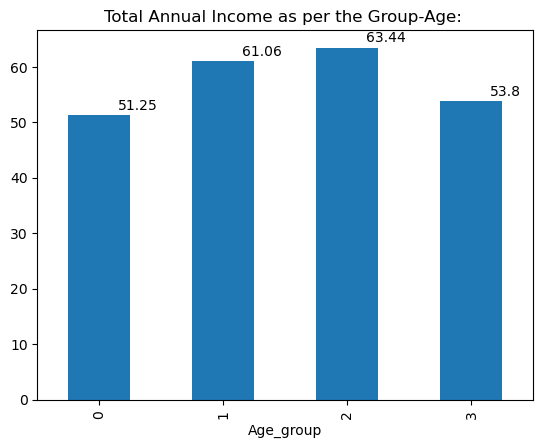

In [22]:
plt.title('Total Annual Income as per the Group-Age: ')
df.pivot_table(columns='Age_group', values=['Annual Income (k$)']).sum().plot(kind='bar')
for p in plt.gca().patches: plt.annotate(str(round(p.get_height(), 2)), (p.get_x() + 0.4, p.get_height() + 1))

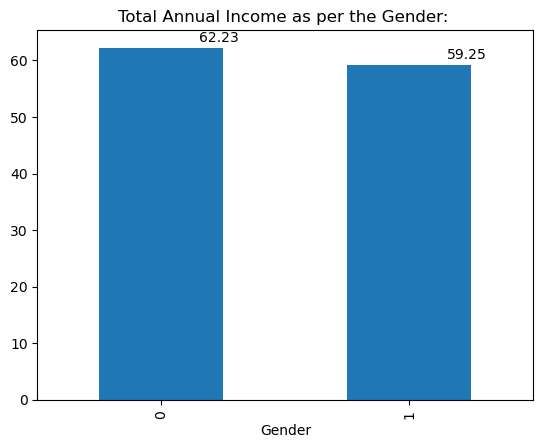

In [23]:
plt.title('Total Annual Income as per the Gender: ')
df.pivot_table(columns='Gender', values=['Annual Income (k$)']).sum().plot(kind='bar')
for p in plt.gca().patches: plt.annotate(str(round(p.get_height(), 2)), (p.get_x() + 0.4, p.get_height() + 1))

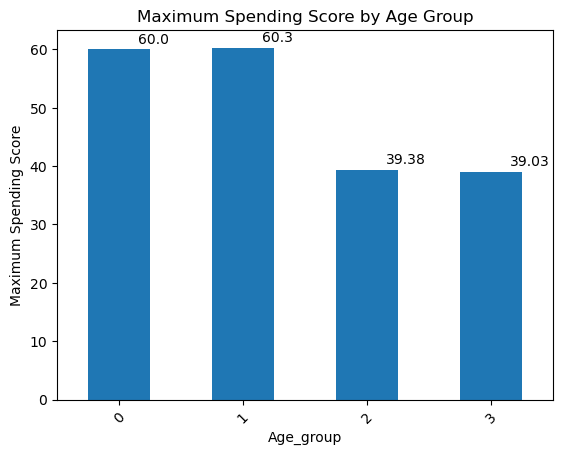

In [24]:
df.pivot_table(columns='Age_group', values='Spending Score (1-100)').max().plot(kind='bar', title='Maximum Spending Score by Age Group')
plt.ylabel('Maximum Spending Score'); plt.xticks(rotation=45)
for p in plt.gca().patches: plt.annotate(str(round(p.get_height(), 2)), (p.get_x() + 0.4, p.get_height() + 1))

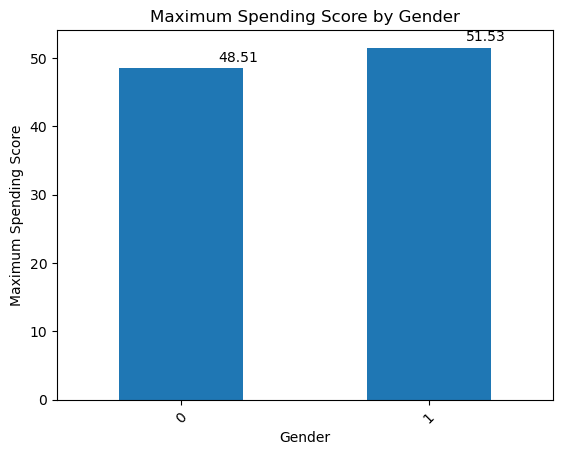

In [25]:
df.pivot_table(columns='Gender', values='Spending Score (1-100)').max().plot(kind='bar', title='Maximum Spending Score by Gender')
plt.ylabel('Maximum Spending Score'); plt.xticks(rotation=45)
for p in plt.gca().patches: plt.annotate(str(round(p.get_height(), 2)), (p.get_x() + 0.4, p.get_height() + 1))

In [26]:
X=df.iloc[:,3:5]

In [27]:
X[:5]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [28]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group
0,1,0,19,15,39,1
1,2,0,21,15,81,1
2,3,1,20,16,6,1
3,4,1,23,16,77,1
4,5,1,31,17,40,1


In [29]:
# WE are using the Elbow Method to find out the optimum no. of clusters
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

<h1> Elbow Method: </h1>

<h5> It is an unsupervised method that helps us to find optimum no. of cluster in KMeans. </h5>

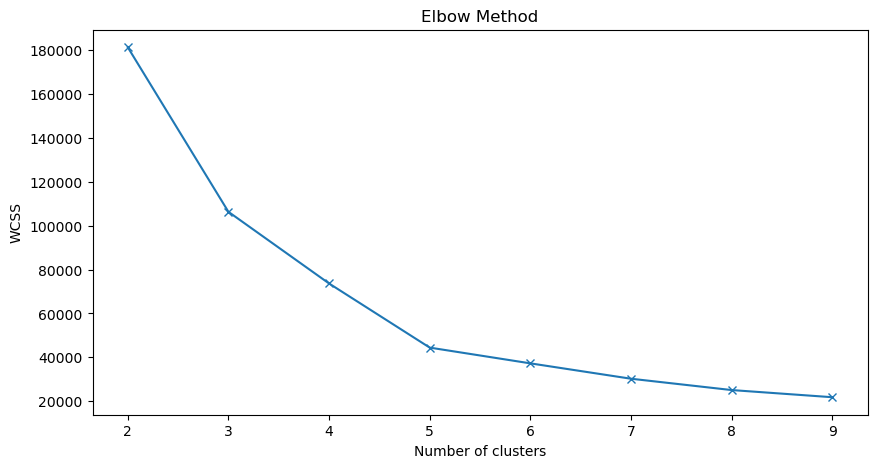

In [30]:
# Plot the Elbow Method
plt.figure(figsize=(10,5))
plt.plot(range(2, 10), wcss, marker='x')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
# Applying KMeans with thwe optimum no. of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

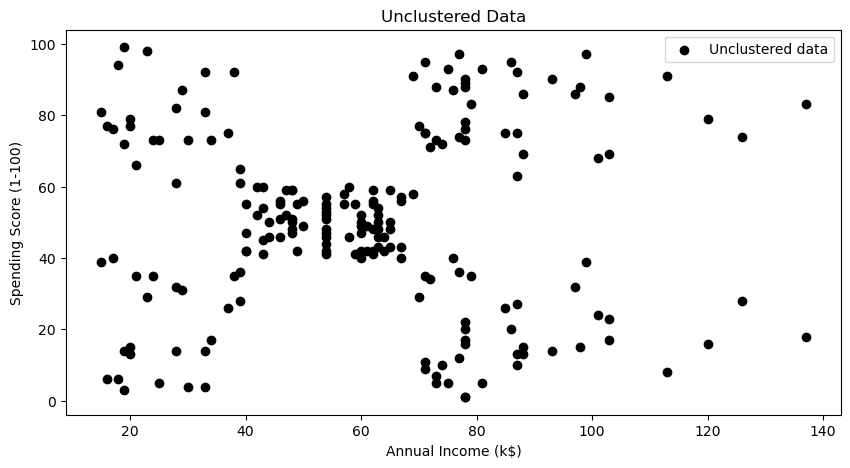

In [32]:
# Groups Before clustering
plt.figure(figsize=(10,5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='black', label='Unclustered data')
plt.title('Unclustered Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

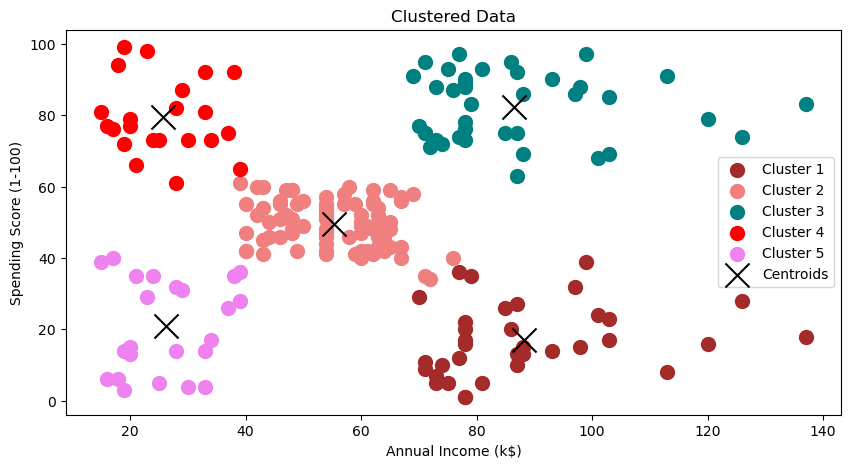

In [33]:
# Groups After clustering
plt.figure(figsize=(10,5))
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s=100, c='brown', label='Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s=100, c='lightcoral', label='Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s=100, c='teal', label='Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s=100, c='red', label='Cluster 4')
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], s=100, c='violet', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, marker='x', c='black', label='Centroids')

plt.title('Clustered Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<h1> Silhouette Score: </h1>

<h5> Howwell our data points belong to our new clusters.</h5>

In [34]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.553931997444648

<h1> KMeans Inertia: </h1>

<h5> It measures that how closely our data points were grouped. </h5>

In [35]:
kmeans.inertia_

44448.45544793371

# Insights Found:

The clustered data reveals distinct consumer behaviors. One group has high income but moderate spending, indicating cautious spending habits. Another shows low income with high spending, spending more relative to earnings. A third group balances mid-level income with average spending. There's also a low-income group with conservative spending, reflecting financial caution. Lastly, a high-income, low-spending group emerges, highlighting wealthier but frugal individuals.

In [36]:
# Done.